# MACHINE LEARNING

## Final Practical

### Submitted To : Prof. Shifali Sharma
### Submitted By : Hrithik Johri (18BCS6145)

### Importing Libraries

In [2]:
import numpy as np # Linear Algebra
import pandas as pd # Data Manipulation 
# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.svm import SVC # Support vector classifier
from sklearn.model_selection import GridSearchCV,train_test_split # GridSearchCV -> hyperparameter tuning; train_test_split -> spliting the dataset into training and testing
from sklearn.metrics import confusion_matrix # Model Evaluation

## Mounting to the GOOGLE DRIVE

In [4]:
# Mounting to the google drive
from google.colab import drive 
drive.mount('/content/gdrive')

import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/ML Lab Prac Final")

Mounted at /content/gdrive


## Loading the data

In [5]:
df = pd.read_csv("3.csv") #Loading the dataset
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom
0,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE
1,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,WHITE,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
2,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE
3,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,PINK,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,BROWN,SEVERAL,WOODS,EDIBLE
4,CONVEX,SMOOTH,WHITE,BRUISES,ALMOND,FREE,CROWDED,NARROW,BROWN,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,PURPLE,SEVERAL,WOODS,EDIBLE


In [13]:
df.shape #shape of the dataframe

(8416, 23)

In [6]:
df.info() #Overall view in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8416 non-null   object
 1   cap-surface               8416 non-null   object
 2   cap-color                 8416 non-null   object
 3   bruises                   8416 non-null   object
 4   odor                      8416 non-null   object
 5   gill-attachment           8416 non-null   object
 6   gill-spacing              8416 non-null   object
 7   gill-size                 8416 non-null   object
 8   gill-color                8416 non-null   object
 9   stalk-shape               8416 non-null   object
 10  stalk-root                8416 non-null   object
 11  stalk-surface-above-ring  8416 non-null   object
 12  stalk-surface-below-ring  8416 non-null   object
 13  stalk-color-above-ring    8416 non-null   object
 14  stalk-color-below-ring  

## EDA

In our dataset, there is no null value available, so there is no need to do NULL-VALUE treatment

In [8]:
df.describe(include = "all") #Gaining insight towards the data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom
count,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416,8416
unique,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7,2
top,CONVEX,SCALY,BROWN,NO,NONE,FREE,CLOSE,BROAD,BUFF,TAPERING,BULBOUS,SMOOTH,SMOOTH,WHITE,WHITE,PARTIAL,WHITE,ONE,PENDANT,WHITE,SEVERAL,WOODS,EDIBLE
freq,3796,3268,2320,5040,3808,8200,6824,5880,1728,4864,3800,5316,5076,4744,4640,8416,8216,7768,3968,2424,4064,3160,4488


### Categorical Variable -> Numerical Variable

In [14]:
# As our data has all the value in the catgorical; So we need to convert that into numerical and this Encoder() function does that
def Encoder(val):
    if val in category:
        return category[val]
    else:
        category[val]=len(category)
    return category[val]

In [18]:
# COnversion of catgorical varible -> Numerical variable
for i in range(df.shape[1]):
    category={}
    df.iloc[:,i]=df.iloc[:,i].apply(Encoder)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 8416 non-null   int64
 1   cap-surface               8416 non-null   int64
 2   cap-color                 8416 non-null   int64
 3   bruises                   8416 non-null   int64
 4   odor                      8416 non-null   int64
 5   gill-attachment           8416 non-null   int64
 6   gill-spacing              8416 non-null   int64
 7   gill-size                 8416 non-null   int64
 8   gill-color                8416 non-null   int64
 9   stalk-shape               8416 non-null   int64
 10  stalk-root                8416 non-null   int64
 11  stalk-surface-above-ring  8416 non-null   int64
 12  stalk-surface-below-ring  8416 non-null   int64
 13  stalk-color-above-ring    8416 non-null   int64
 14  stalk-color-below-ring    8416 non-null 

As we can see that the object datatypes are converted into the int64

In [20]:
df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Visualization

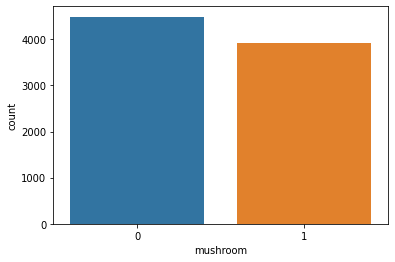

In [37]:
# Ploting the number of edible and poisonous mushroom in the dataset
sns.countplot(x = "mushroom", data = df)
# 0 is edible 
# 1 is poisonous

In [26]:
correlation=df.corr() # Findng the correlation in the features in the dataset

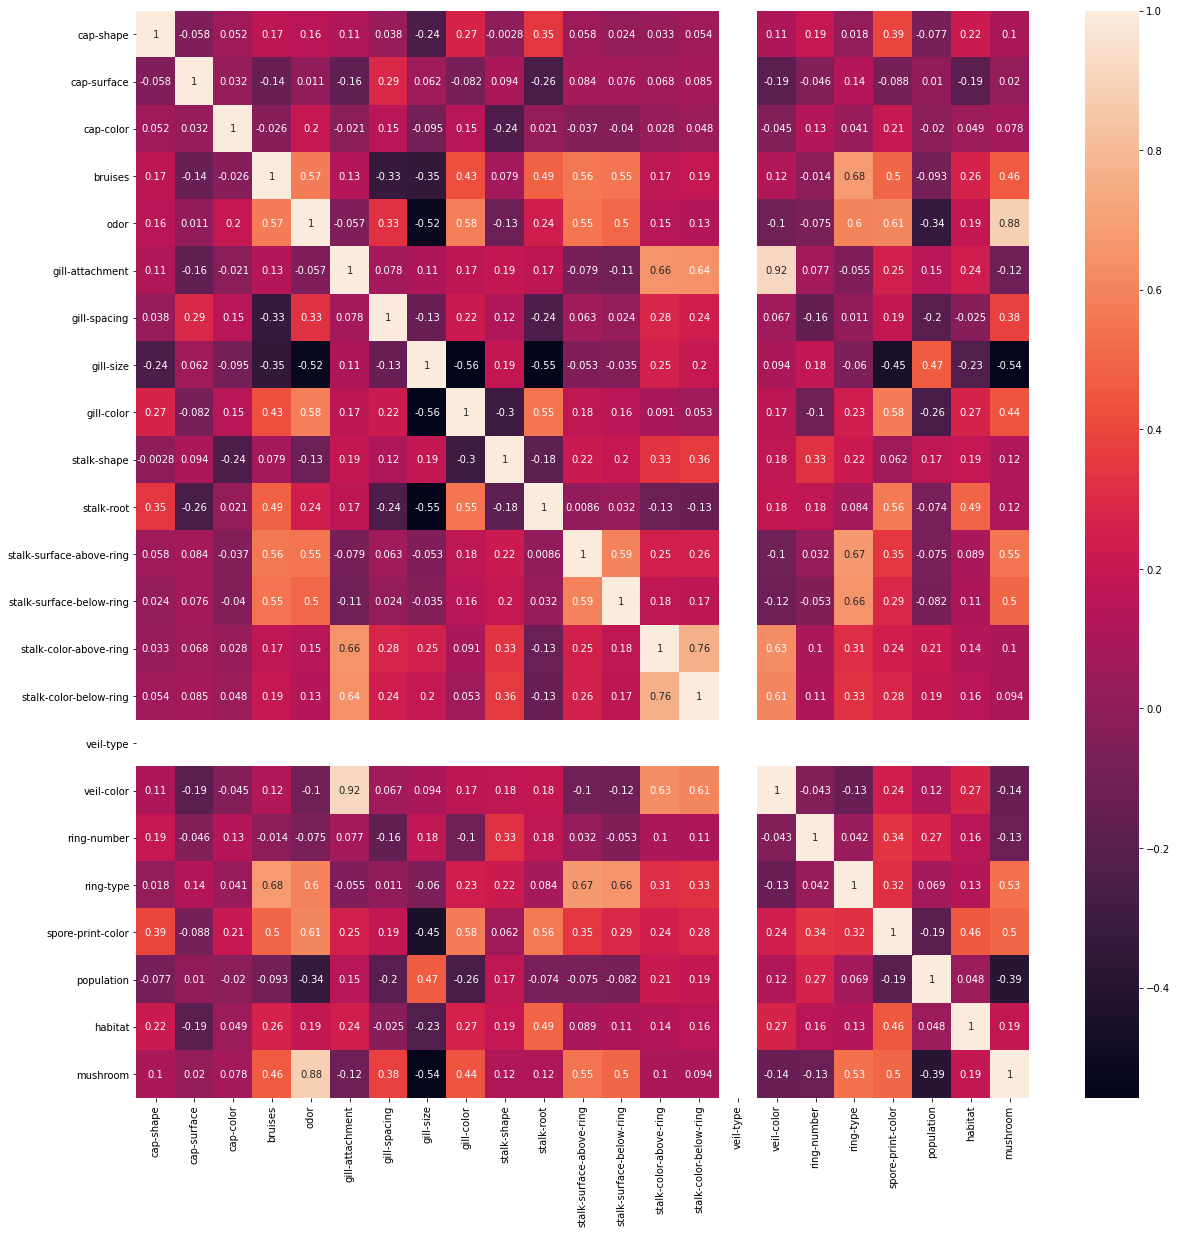

In [27]:
# Heatmap of the correlation
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True)

In [28]:
df["veil-type"].value_counts()

0    8416
Name: veil-type, dtype: int64

From this heatmap we gained a new insight that "veil-type" has only one type data available. So that feature is no longer required. We will drop it later in the notebook

In [29]:
df.describe(include = "all")

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,mushroom
count,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.00000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.0,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000,8416.000000
mean,0.911597,1.070342,2.455798,0.598859,3.353612,0.025665,0.810837,0.698669,3.91730,0.422053,1.782319,0.657319,1.032319,1.006654,1.064639,0.0,0.057985,0.082700,0.711027,2.900190,1.321293,1.834125,0.466730
std,1.190886,0.839203,1.607157,0.490159,1.961836,0.158144,0.391662,0.458863,3.32481,0.493916,1.780104,0.899443,1.336147,1.671530,1.723792,0.0,0.381962,0.295428,0.784976,1.649651,1.567769,1.760882,0.498922
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,1.000000,1.000000,3.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,3.000000,1.000000,2.000000,0.000000
75%,1.000000,2.000000,3.000000,1.000000,5.000000,0.000000,1.000000,1.000000,6.00000,1.000000,4.000000,2.000000,3.000000,1.000000,1.000000,0.0,0.000000,0.000000,1.000000,5.000000,3.000000,3.000000,1.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.00000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000,1.000000


## Data preparation

In [31]:
# Independent features
X = df.drop(["mushroom", "veil-type"], axis = 1) # droping "Mushroom"(target var), and "veil-type"

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8416 entries, 0 to 8415
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 8416 non-null   int64
 1   cap-surface               8416 non-null   int64
 2   cap-color                 8416 non-null   int64
 3   bruises                   8416 non-null   int64
 4   odor                      8416 non-null   int64
 5   gill-attachment           8416 non-null   int64
 6   gill-spacing              8416 non-null   int64
 7   gill-size                 8416 non-null   int64
 8   gill-color                8416 non-null   int64
 9   stalk-shape               8416 non-null   int64
 10  stalk-root                8416 non-null   int64
 11  stalk-surface-above-ring  8416 non-null   int64
 12  stalk-surface-below-ring  8416 non-null   int64
 13  stalk-color-above-ring    8416 non-null   int64
 14  stalk-color-below-ring    8416 non-null 

In [36]:
# Target feature
y = df["mushroom"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: mushroom, dtype: int64

## Train-Test Split

In [38]:
(X_train,X_test,Y_train,Y_test)=train_test_split(X,y,test_size=0.30)

## Hyper-parameter Tuning

In [39]:
svc=SVC() # Support vector Classifier
# Selecting parameters through GridSearchCV
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],'C': [1, 10, 100]},
              {'kernel': ['linear'], 'C': [1, 10, 100]}]

grid = GridSearchCV(svc,param_grid,cv=10,scoring='accuracy')
print("Tuning hyper-parameters")
grid.fit(X_train,Y_train)
print(grid.best_params_)
print(np.round(grid.best_score_,3))

Tuning hyper-parameters
{'C': 10, 'kernel': 'linear'}
1.0


## Model Building

In [40]:
# the model building part.
# value of gamma is low = 0.001 & rbf(Radial Basis Function is used)
svc=SVC(C=100,gamma=0.001,kernel='rbf')

In [41]:
svc.fit(X_train,Y_train) # Fitting the training model

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Testing the model

In [42]:
svc.score(X_test,Y_test)

0.9996039603960396

**The accuracy of our model is 99.96%**

## Model Evaluation

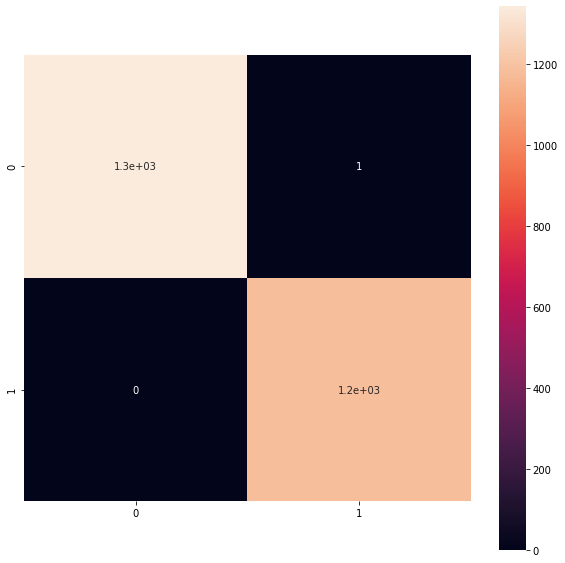

In [44]:
Ypreds=svc.predict(X_test)
cm = confusion_matrix(Y_test,Ypreds) # For Model Evaluation
xy=np.array([0,1])
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,square=True,xticklabels=xy,yticklabels=xy)

In a confussion matrix our target is to find True positive(0,0) and false negetive(1,1), and as we can see in our model the value is very high.

# Thank You